In [1]:
#imports
from pathlib import Path

#file paths
ROOT = ROOT = Path.cwd().parent
RAW_DIR = ROOT/"data"/"raw"
PROCESSED_DIR = ROOT/"data"/"processed"

import sys, os
import pandas as pd
import numpy as np

sys.path.insert(0, os.path.abspath("..")) #preprocess at root
from preprocess import load_csv, save_csv

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Imports loaded")

Imports loaded


In [2]:
#1.1 load data
"""
Data cleaned in previous assignments. Load cleaned data directly
Cleaned data contains:
    NaN filled with 0
    regex normalization (spaces, lowercase,etc)
    churn to binary (1=churn, 0=not)
"""

df_clean = load_csv(PROCESSED_DIR, "data03_cleaned.csv")
total_charges = pd.to_numeric(df_clean.totalcharges, errors='coerce') #reconvert data type. pandas infers incorrectly from csv

print("Data")
display(df_clean.head().T) #transpose rows/cols to make viewing easier
print("\nDataTypes:")
display(df_clean.dtypes)

Loaded data03_cleaned.csv: length: 7043 

Data


,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no



DataTypes:


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [3]:
#1.2 split features 'X' and target 'y' (churn=1 or not-churn=0). PCA only applied to features
y = df_clean['churn'].values #target

df_features = df_clean.drop(['customerid', 'churn'], axis=1) #drop id and target

df_features.head().T

,0,1,2,3,4
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no
onlinebackup,yes,no,yes,no,no


In [4]:
#1.3 Build original full feature set 'X' with one-hot encoded values
#1.3.1 turn feature df int list of dicts (1 dict per row) for DictVectorizer to use
feature_dicts = df_features.to_dict(orient='records')
print("First element of dictionary:")
display(feature_dicts[0])

#1.3.2 create and fit DectVectorizer (convert to one-hot encode)
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(feature_dicts) #build list of categoires and column mappings (fit) + one-hot encode and apply to full feature set (transform)

print("\nShape of X (samples, features):", X.shape)
print("\nFirst row of X:")
display(X[0])

print("\nNames of columns after one-hot encoding:")
display(dv.get_feature_names_out())

First element of dictionary:


{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'tenure': 1,
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 29.85,
 'totalcharges': 29.85}


Shape of X (samples, features): (7043, 45)

First row of X:


array([ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  1.  ,  0.  ,  0.  , 29.85,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  , 29.85])


Names of columns after one-hot encoding:


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [5]:
#1.4 Standardize data (mean 0, std dev 1)
scaler = StandardScaler()

#calculate mean and standard deviation (fit) and apply z-score
X_scaled = scaler.fit_transform(X) #full feature set z-scored

print("Shape ('n' X 'm'):", X_scaled.shape)

Shape ('n' X 'm'): (7043, 45)


In [6]:
#2.1 Build PCA objects - scikit object that stores the Principal component list
"""
1. calculate covariance of each column with each other column
    Cov(x, y) = 1/(n-1)∑(x_i – mean_i)(y_i – mean_y)
2. build covariance matrix 'C': (m X m)
    m: number of features (columns in X_scaled)
    C(i, j): matrix with the covariances of each feature to each other feature
    covariance of feature with itself is (aproximately) 1 (1's along diagnol) (data has been standarized)
3. goal: find non-zero eigenvectors 'v' which solve the equation Cv = λv

    3.1 find eiganvalues 'λ'. same number of eiganvlues as features
    set det(C−λI) = 0. If det = 0 a non-zeror solution for the eigenvector exists
    solve for λ, the eigenvalues which produce non-zer eigen vectors

    3.2 find corresponding eigenvectors for each eiganvalue by solving equation: (C−λI)v=0
    Eigenvector: direction data naturally varies the most
    Eigenvalue: magnitude of variance the data has in that direction. shows how important that principal component is

    This gives you your Principal Components: (eigenvalue, eigenvector) pair
4. Sort Principal components (eiganvalue/eiganvector pairs) in descending order of magnitude (eigenvalue)   
"""

pca = PCA()       #create scikit pca objects
pca.fit(X_scaled) #learn principal coponents from standardized feature set

#confirm shape (m X m)
print("Built PCA component matrix:", pca.components_.shape)

Built PCA component matrix: (45, 45)


In [7]:
#2.2 EDA
#eiganvalues (raw variance of each PC)
print("Top 10 eiganvalues:", pca.explained_variance_[:10])

#explained variance ratios: eiganvalues normalized into percentages of total variance
evr = pca.explained_variance_ratio_
print("\nTop 10 ratios:", evr[:10])

#eiganvector of first PC (1 X m). Direction of highest variance.
#values are how much each original feature contributes to that PC
pc1 = pca.components_[0]
print("\nFirst eiganvector:", pc1)

#build PC1 df to show how much each feature is contributing
feature_names = dv.get_feature_names_out() #names of features
pc1_df = pd.DataFrame({
    'feature': feature_names,
    'contribution': pc1
})

print("\nFirst 5 features in eigenvector")
display(pc1_df.head())

#sort by absolute contribution
pc1_df['abs_contribution'] = pc1_df['contribution'].abs()
pc1_sorted = pc1_df.sort_values('abs_contribution', ascending=False)

print("\nTop 5 PC1 features contributing")
display(pc1_sorted.head())

#sort by positive and negative contributors
print("\nTop 5 positive contributors")
display(pc1_sorted[pc1_sorted['contribution'] > 0].head())

print("\nTop 5 negative contributors")
display(pc1_sorted[pc1_sorted['contribution'] < 0].head())

Top 10 eiganvalues: [11.3571544   6.07485408  4.24695992  2.53962646  2.25120934  2.00212286
  1.67066927  1.55666992  1.36412063  1.29546819]

Top 10 ratios: [0.25234537 0.13497759 0.09436349 0.05642813 0.05001977 0.0444853
 0.03712071 0.03458775 0.03030949 0.02878409]

First eiganvector: [-0.07234608  0.01461105  0.07028999 -0.05692608  0.05692608 -0.13156345
  0.29181666 -0.11562793 -0.00279931  0.00279931 -0.08101327 -0.1646934
  0.29181666 -0.24254362  0.11552326 -0.04502015 -0.08992047 -0.13219141
  0.29181666 -0.11492706 -0.16337221  0.29181666 -0.08522008  0.1236251
 -0.1236251  -0.00079101  0.00079101 -0.00045819  0.00166056 -0.10473064
  0.11655705 -0.04502015  0.04502015 -0.07258743 -0.10714915  0.29181666
 -0.13920649 -0.10815476  0.29181666 -0.1382675  -0.16018861  0.29181666
 -0.0884288  -0.02038163 -0.12534689]

First 5 features in eigenvector


,feature,contribution
0,contract=month-to-month,-0.072346
1,contract=one_year,0.014611
2,contract=two_year,0.070290
3,dependents=no,-0.056926
4,dependents=yes,0.056926



Top 5 PC1 features contributing


,feature,contribution,abs_contribution
6,deviceprotection=no_internet_service,0.291817,0.291817
12,internetservice=no,0.291817,0.291817
35,streamingmovies=no_internet_service,0.291817,0.291817
18,onlinebackup=no_internet_service,0.291817,0.291817
38,streamingtv=no_internet_service,0.291817,0.291817



Top 5 positive contributors


,feature,contribution,abs_contribution
6,deviceprotection=no_internet_service,0.291817,0.291817
12,internetservice=no,0.291817,0.291817
35,streamingmovies=no_internet_service,0.291817,0.291817
18,onlinebackup=no_internet_service,0.291817,0.291817
38,streamingtv=no_internet_service,0.291817,0.291817



Top 5 negative contributors


,feature,contribution,abs_contribution
13,monthlycharges,-0.242544,0.242544
11,internetservice=fiber_optic,-0.164693,0.164693
20,onlinesecurity=no,-0.163372,0.163372
40,techsupport=no,-0.160189,0.160189
36,streamingmovies=yes,-0.139206,0.139206



Cumulative variance of first 10 PC's: [0.25234537 0.38732296 0.48168645 0.53811458 0.58813435 0.63261966
 0.66974037 0.70432812 0.73463761 0.7634217 ]

Components to reach 90% variance: 16


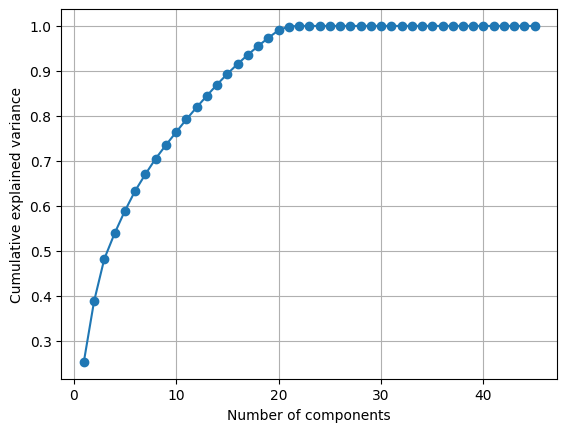

In [8]:
#3.1 determine 'k' Principal Components to keep
#cumulative sum. total variance explain by first 'k' components
cum_evr = np.cumsum(evr)
print("\nCumulative variance of first 10 PC's:", cum_evr[:10])

#calculate how many features 'k' show 90% of variance
k_90 = np.argmax(cum_evr >= 0.90) + 1
print("\nComponents to reach 90% variance:", k_90)

#visualize the cumulative variance across PC's
plt.plot(range(1, len(evr)+1), cum_evr, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

In [9]:
#3.2 project onto top k components
pca_k = PCA(n_components=k_90)
Z = pca_k.fit_transform(X_scaled)

print("Shape: ", Z.shape)

#project data onto Principal components
"""
X_scaled: original feature matrix
W_k: matrix with rows of top k eigenvectors (directions) (sorted by top k eigenvalues)
Z: transformed dataset in k-dimensional PCA space
each row is a vector for a customer, each value in this vector tells how much that PC applies to that customer
"""
print("\nFirst 5 rows in PCA space:")
print(Z[:5])

Shape:  (7043, 16)

First 5 rows in PCA space:
[[-1.99904447 -3.07099882  4.5434443   1.13646754  2.94386584  1.7737914
  -1.95786243 -0.77773416  1.57551875 -1.2240682  -0.16308291  0.51755125
   0.29457785 -0.2737456   1.05349847  0.44591043]
 [-0.33277659 -1.20759525  1.83410074 -1.04144268 -3.50786274 -1.72003119
   1.05120968  0.78208993  0.99739553  2.27835178 -0.12665983  0.08902209
   1.30181517  2.20326299 -0.28245047 -0.64781186]
 [-0.86423129 -2.90476158  1.08860909 -1.12293971 -2.35846081 -1.3212866
  -0.73848144 -2.31207659  0.85689533 -1.55214426 -0.03368537 -0.63980566
   1.61720428  0.97663381 -0.69792895 -1.42767696]
 [-1.06200078 -0.10865356  6.37220061  2.00287368 -1.61093888 -1.48932465
  -0.40756795  0.99961031  0.1110301   2.57313396  1.78358159  0.09139123
  -0.05310497  0.90329105  0.10517668  1.63799115]
 [-1.83704026 -4.21022636 -1.43764343 -0.56849697 -0.19916842  1.45079633
   0.09612203 -0.6830874  -0.21217066  0.19782415 -0.07193489  0.428767
   0.08701468

In [10]:
#4.1 split data for training
#shuffle and split 20% test, 80% train
df_train_full, df_test = train_test_split(df_clean, test_size=0.2, random_state=1)

#split train_full into train and validation sets
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

#confirm shapes
print("Shapes:")
print("Train:", df_train.shape)
print("Val:  ", df_val.shape)
print("Test: ", df_test.shape)

#save churn as target
y_train = df_train.churn.values
y_val = df_val.churn.values

#drop churn col - don't use for training
del df_train['churn']
del df_train['customerid']
del df_val['churn']
del df_val['customerid']

#confirm shapes
print("\nShapes after dropping:")
print("Train:", df_train.shape)
print("Val:  ", df_val.shape)

Shapes:
Train: (3774, 21)
Val:   (1860, 21)
Test:  (1409, 21)

Shapes after dropping:
Train: (3774, 19)
Val:   (1860, 19)


In [11]:
#4.2 one-hot encodoing
#4.2.1 convert to dicts
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

#4.2.2 fit DictVectorizer on train only
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

print("Train shape:", X_train.shape) #rows: training samples #cols: numerical + one-hot

#reuse mapping for val and test
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

print("Val shape:  ", X_val.shape)
print("Test shape: ", X_test.shape)

Train shape: (3774, 45)
Val shape:   (1860, 45)
Test shape:  (1409, 45)


In [12]:
#5 Basline  model (no PCA)
#5.1 train logistic regregression model
model_base = LogisticRegression(solver='liblinear', random_state=1) #SciKit model
model_base.fit(X_train, y_train)                                    #train model

#5.2 predict/eval
y_pred_base = model_base.predict(X_val) #model's decision for each sample
y_pred_prob_base = model_base.predict_proba(X_val)[:, 1] #probability of churning

print("Baseline Logistic Regression Metrics")
acc_base = accuracy_score(y_val, y_pred_base)     #Accurcy: percentage of precitions that are correct. Overall performance
auc_base = roc_auc_score(y_val, y_pred_prob_base) #ROC AUC: Reliability. How well model ranks churners (+/1) vs non-churn(-/0)

print("Accuracy:", acc_base)
print("ROC AUC: ", auc_base)

Baseline Logistic Regression Metrics
Accuracy: 0.8016129032258065
ROC AUC:  0.8363396349608545


In [13]:
#6.1 prepare to train PCA model
#6.1.1 standarize (z-score)
X_train_scaled = scaler.fit_transform(X_train) #only fit (learn mean and std dev) from training data features
X_val_scaled = scaler.transform(X_val)

#5.1.2 fit PCA on scaled training data using pca_k determined in step 3.2
X_train_pca = pca_k.fit_transform(X_train_scaled) #learn covariance of scaled data, eigenvectors, project from 45D to 16D
X_val_pca = pca_k.transform(X_val_scaled)

#check shapes
print("PCA train shape:", X_train_pca.shape)
print("PCA val shape:  ", X_val_pca.shape)

PCA train shape: (3774, 16)
PCA val shape:   (1860, 16)


In [14]:
#6.2 PCA model k = 90%
#6.2.1 train logistic regression model
model_pca = LogisticRegression(solver='liblinear', random_state=1) #SciKit model
model_pca.fit(X_train_pca, y_train)                                #train model

#6.2.2 predict eval
y_pred_pca = model_pca.predict(X_val_pca) #model's decision for each sample
y_pred_prob_pca = model_pca.predict_proba(X_val_pca)[:, 1] #probability of churning

print("PCA Logistic Regression Metrics")
acc_pca = accuracy_score(y_val, y_pred_pca)     #Accurcy: percentage of precitions that are correct. Overall performance
auc_pca = roc_auc_score(y_val, y_pred_prob_pca) #ROC AUC: Reliability. How well model ranks churners (+/1) vs non-churn(-/0)

print("Accuracy:", acc_pca)
print("ROC AUC: ", auc_pca)

PCA Logistic Regression Metrics
Accuracy: 0.7844086021505376
ROC AUC:  0.8212160284172252
